# 感知機演算法：從歷史到實作
## Perceptron Algorithm: From History to Implementation

### 課程目標
- 了解感知機的歷史背景和重要性
- 理解感知機收斂定理的核心概念
- 實作簡單的感知機演算法（無學習率版本）
- 體驗機器學習的基礎原理

---

**適合對象**: 大一學生  
**先備知識**: 基礎 Python 程式設計、線性代數概念  
**預計時間**: 50 分鐘


## 第一部分：感知機的歷史故事 📚

### 1957年：人工智慧的黎明

想像一下，在 1957 年，電腦還是房間大小的巨型機器，人們對於「機器能否思考」這個問題充滿好奇。就在這一年，美國心理學家 **Frank Rosenblatt** 在康乃爾大學提出了一個革命性的想法：**感知機 (Perceptron)**。

### 什麼是感知機？

感知機是第一個能夠「學習」的人工神經元模型。它模仿了人腦神經元的基本功能：
- 接收多個輸入信號
- 對信號進行加權處理
- 做出二元決策（是/否、正/負）

### 歷史意義

1. **第一個學習演算法**: 感知機是第一個被證明能夠自動學習的演算法
2. **神經網路的起源**: 現代深度學習的理論基礎
3. **機器學習的開端**: 開啟了機器學習領域的大門

### Rosenblatt 的願景

Rosenblatt 相信感知機能夠：
- 識別圖像和模式
- 學習語言
- 甚至發展出創造力

雖然當時的技術限制讓這些願景無法實現，但他的想法為今天的 AI 革命奠定了基礎。


## 第二部分：感知機收斂定理 🎯

### 什麼是收斂定理？

**感知機收斂定理** 是 Rosenblatt 最重要的理論貢獻。它證明了一個令人驚奇的事實：

> **如果資料是線性可分的，感知機演算法保證會在有限步驟內找到正確的分類邊界！**

### 定理的核心概念

1. **線性可分**: 存在一條直線（或超平面）能完美分開兩類資料
2. **錯誤修正**: 每次預測錯誤時，調整權重向正確方向移動
3. **有限收斂**: 更新次數是有限的，演算法必定會停止

### 為什麼不需要學習率？

在 Rosenblatt 的原始版本中，感知機使用最簡單的更新規則：
- 預測錯誤時：`w = w + x`（正類）或 `w = w - x`（負類）
- 預測正確時：不更新

這種「全力修正」的方式雖然看起來粗暴，但數學上可以證明它會收斂！

### 幾何直觀

想像你在黑暗中尋找一個目標：
- 每次撞牆（預測錯誤）時，你就調整方向
- 雖然路徑可能曲折，但最終一定會到達目標
- 感知機的學習過程就是這樣的「智慧試錯」


In [6]:
# 🔧 自動環境設定和套件安裝
import sys
import subprocess

def install_package(package_name):
    """自動安裝缺失的套件"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"✅ {package_name} 安裝成功")
        return True
    except subprocess.CalledProcessError:
        print(f"❌ {package_name} 安裝失敗")
        return False

# 檢查並安裝 NumPy
try:
    import numpy as np
    print("✅ NumPy 已安裝")
except ImportError:
    print("📦 正在安裝 NumPy...")
    if install_package("numpy"):
        import numpy as np
        print("✅ NumPy 導入成功")
    else:
        raise ImportError("無法安裝 NumPy")

# 檢查並安裝 Matplotlib
try:
    import matplotlib.pyplot as plt
    print("✅ Matplotlib 已安裝")
except ImportError:
    print("📦 正在安裝 Matplotlib...")
    if install_package("matplotlib"):
        import matplotlib.pyplot as plt
        print("✅ Matplotlib 導入成功")
    else:
        raise ImportError("無法安裝 Matplotlib")

# 導入感知機模組
try:
    from simple_perceptron import SimplePerceptron, create_linearly_separable_data
    print("✅ 感知機模組導入成功")
except ImportError:
    print("❌ 感知機模組導入失敗，請確認 simple_perceptron.py 在同一資料夾")
    print(f"當前工作目錄: {__import__('os').getcwd()}")
    raise

# 設定中文字體顯示
try:
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'PingFang TC']
    plt.rcParams['axes.unicode_minus'] = False
    print("✅ 中文字體設定完成")
except:
    print("⚠️ 中文字體設定可能有問題，但不影響功能")

# 顯示環境資訊
print("\n" + "="*50)
print("🚀 環境設定完成！準備開始感知機實作")
print(f"NumPy 版本: {np.__version__}")
print(f"Matplotlib 版本: {plt.matplotlib.__version__}")
print(f"Python 版本: {sys.version}")
print(f"Python 執行檔: {sys.executable}")
print(f"當前工作目錄: {__import__('os').getcwd()}")
print("="*50)


📦 正在安裝 NumPy...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.7 kB/s eta 0:00:00a 0:00:03


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


✅ numpy 安裝成功
✅ NumPy 導入成功
📦 正在安裝 Matplotlib...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 34.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.9 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


✅ matplotlib 安裝成功



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip


✅ Matplotlib 導入成功
✅ 感知機模組導入成功
✅ 中文字體設定完成

🚀 環境設定完成！準備開始感知機實作
NumPy 版本: 2.3.3
Matplotlib 版本: 3.10.6
Python 版本: 3.12.6 (v3.12.6:a4a2d2b0d85, Sep  6 2024, 16:08:03) [Clang 13.0.0 (clang-1300.0.29.30)]
Python 執行檔: /usr/local/bin/python3.12
當前工作目錄: /Users/jianweiheng/Desktop/TA code/10-9


## 第三部分：動手實作感知機 💻

### 步驟 1：創建線性可分的資料集

首先，我們需要一些資料來訓練感知機。我們會創建一個簡單的 2D 資料集，其中兩類資料可以用一條直線完美分開。


創建訓練資料...
資料形狀: (16, 2)
特徵矩陣 X 的前 5 個樣本:
[[-2.60063869 -2.29169375]
 [-0.53435123 -2.2257763 ]
 [ 1.53052561  2.54256004]
 [-2.60170661 -0.14772182]
 [ 1.53658231  1.53427025]]

標籤 y: [-1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1.  1.]
正類 (+1) 數量: 8
負類 (-1) 數量: 8


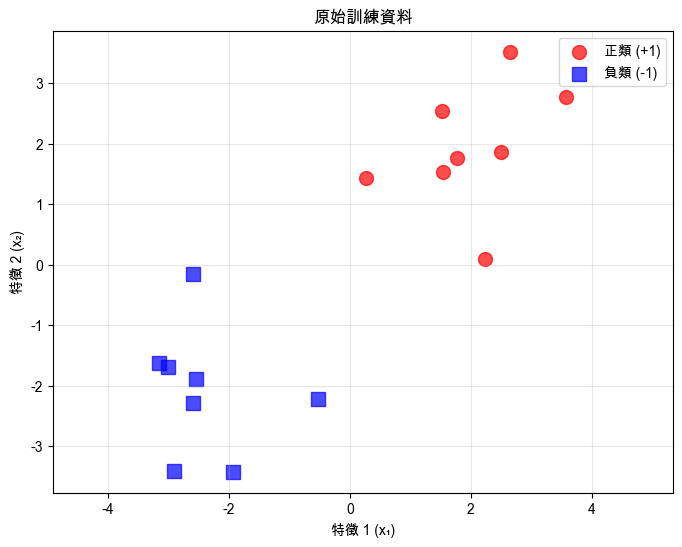


✅ 可以看到兩類資料明顯分開，這就是「線性可分」的資料！


In [7]:
# 創建線性可分的資料集
print("創建訓練資料...")
X, y = create_linearly_separable_data(n_samples=8, random_state=42)

print(f"資料形狀: {X.shape}")
print(f"特徵矩陣 X 的前 5 個樣本:")
print(X[:5])
print(f"\n標籤 y: {y}")
print(f"正類 (+1) 數量: {np.sum(y == 1)}")
print(f"負類 (-1) 數量: {np.sum(y == -1)}")

# 視覺化原始資料
plt.figure(figsize=(8, 6))
positive_mask = y == 1
negative_mask = y == -1

plt.scatter(X[positive_mask, 0], X[positive_mask, 1], 
           c='red', marker='o', s=100, label='正類 (+1)', alpha=0.7)
plt.scatter(X[negative_mask, 0], X[negative_mask, 1], 
           c='blue', marker='s', s=100, label='負類 (-1)', alpha=0.7)

plt.xlabel('特徵 1 (x₁)')
plt.ylabel('特徵 2 (x₂)')
plt.title('原始訓練資料')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print("\n✅ 可以看到兩類資料明顯分開，這就是「線性可分」的資料！")


### 步驟 2：初始化感知機

現在我們創建一個感知機實例。注意我們使用閾值 θ = 0，這是最常見的設定。


In [8]:
# 初始化感知機
print("初始化感知機...")
perceptron = SimplePerceptron(threshold=0.0)

print(f"閾值 θ = {perceptron.threshold}")
print(f"初始權重: {perceptron.weights}")
print(f"是否已收斂: {perceptron.converged}")

print("\n📝 感知機的工作原理:")
print("1. 計算 w·x (權重與輸入的內積)")
print("2. 如果 w·x > θ，預測為 +1；否則預測為 -1")
print("3. 如果預測錯誤，更新權重：")
print("   - 真實標籤為 +1：w = w + x")
print("   - 真實標籤為 -1：w = w - x")
print("4. 重複直到所有預測都正確")


初始化感知機...
閾值 θ = 0.0
初始權重: None
是否已收斂: False

📝 感知機的工作原理:
1. 計算 w·x (權重與輸入的內積)
2. 如果 w·x > θ，預測為 +1；否則預測為 -1
3. 如果預測錯誤，更新權重：
   - 真實標籤為 +1：w = w + x
   - 真實標籤為 -1：w = w - x
4. 重複直到所有預測都正確


### 步驟 3：訓練感知機

現在是最激動人心的時刻！我們要看著感知機如何一步步學會分類。


In [9]:
# 開始訓練！
print("🚀 開始訓練感知機...")
print("=" * 50)

success = perceptron.fit(X, y, max_epochs=50)

print("\n" + "=" * 50)
if success:
    print("🎉 恭喜！感知機成功收斂了！")
else:
    print("⚠️ 達到最大訓練輪數，但可能還未完全收斂")

# 顯示訓練摘要
summary = perceptron.get_training_summary()
print(f"\n📊 訓練摘要:")
print(f"   收斂狀態: {'✅ 已收斂' if summary['converged'] else '❌ 未收斂'}")
print(f"   訓練輪數: {summary['n_epochs']}")
print(f"   權重更新次數: {summary['n_updates']}")
print(f"   最終權重: {summary['final_weights']}")
print(f"   閾值: {summary['threshold']}")

print(f"\n🧮 決策邊界方程式:")
w1, w2 = summary['final_weights']
print(f"   {w1:.3f} × x₁ + {w2:.3f} × x₂ = {summary['threshold']}")


🚀 開始訓練感知機...
開始訓練感知機...
資料點數量: 16, 特徵維度: 2
閾值 θ = 0.0
--------------------------------------------------
Epoch   1: 1 個錯誤, 權重 = [1.53052561 2.54256004]
Epoch   2: 0 個錯誤, 權重 = [1.53052561 2.54256004]

🎉 感知機已收斂！
總更新次數: 1
最終權重: [1.53052561 2.54256004]

🎉 恭喜！感知機成功收斂了！

📊 訓練摘要:
   收斂狀態: ✅ 已收斂
   訓練輪數: 2
   權重更新次數: 1
   最終權重: [1.53052561 2.54256004]
   閾值: 0.0

🧮 決策邊界方程式:
   1.531 × x₁ + 2.543 × x₂ = 0.0


### 步驟 4：視覺化學習結果

讓我們看看感知機學到了什麼！


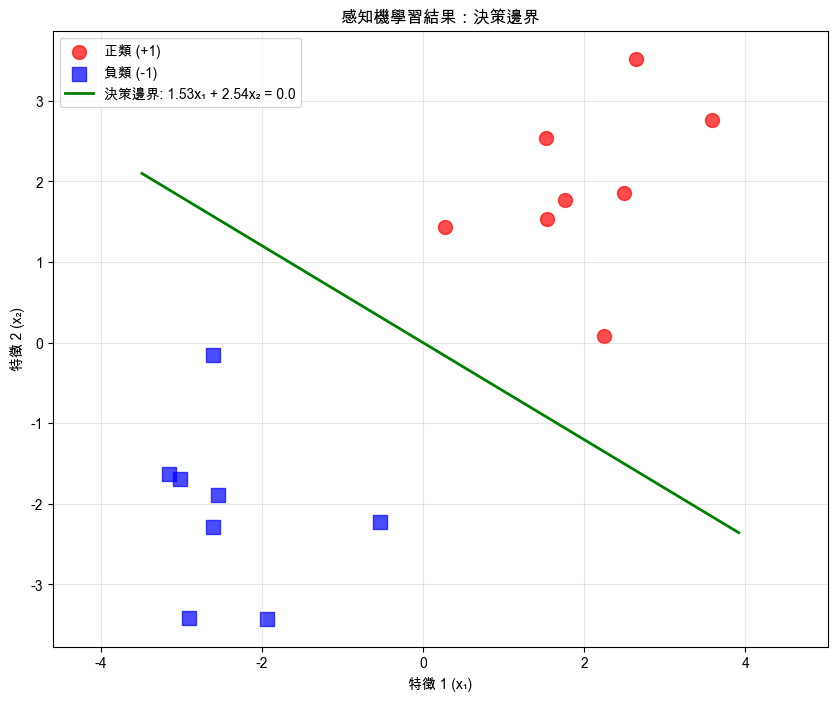

🔍 測試所有訓練樣本的預測結果:
------------------------------------------------------------
樣本編號 | 特徵 (x₁, x₂)     | 真實標籤 | 預測標籤 | 正確性
------------------------------------------------------------


ValueError: Unknown format code 'd' for object of type 'float'

In [ ]:
# 繪製決策邊界
perceptron.plot_decision_boundary(X, y, "感知機學習結果：決策邊界")

# 測試所有訓練樣本
print("🔍 測試所有訓練樣本的預測結果:")
print("-" * 60)
print("樣本編號 | 特徵 (x₁, x₂)     | 真實標籤 | 預測標籤 | 正確性")
print("-" * 60)

all_correct = True
for i in range(len(X)):
    pred = perceptron.predict(X[i])
    correct = "✅" if pred == y[i] else "❌"
    if pred != y[i]:
        all_correct = False
    
    print(f"   {i:2d}    | ({X[i,0]:6.2f}, {X[i,1]:6.2f}) |    {int(y[i]):2d}    |    {pred:2d}    |   {correct}")

print("-" * 60)
if all_correct:
    print("🎉 所有樣本都預測正確！感知機完美學會了分類任務！")
else:
    print("⚠️ 還有一些樣本預測錯誤，可能需要更多訓練。")


## 第四部分：深入理解學習過程 🔍

### 觀察權重的變化軌跡

讓我們看看感知機在學習過程中權重是如何變化的：


In [ ]:
# 分析訓練歷史
print("📈 權重變化軌跡:")
print("=" * 50)

weights_history = []
for epoch_data in perceptron.training_history:
    epoch = epoch_data['epoch']
    n_errors = epoch_data['n_errors']
    weights = epoch_data['weights']
    weights_history.append(weights.copy())
    
    print(f"Epoch {epoch:2d}: {n_errors} 個錯誤, 權重 = [{weights[0]:7.3f}, {weights[1]:7.3f}]")

# 繪製權重變化圖
weights_history = np.array(weights_history)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(weights_history) + 1), weights_history[:, 0], 'ro-', label='w₁')
plt.plot(range(1, len(weights_history) + 1), weights_history[:, 1], 'bo-', label='w₂')
plt.xlabel('訓練輪數 (Epoch)')
plt.ylabel('權重值')
plt.title('權重變化軌跡')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(weights_history[:, 0], weights_history[:, 1], 'go-', markersize=8, alpha=0.7)
plt.plot(weights_history[0, 0], weights_history[0, 1], 'rs', markersize=12, label='起始點')
plt.plot(weights_history[-1, 0], weights_history[-1, 1], 'bs', markersize=12, label='終點')
plt.xlabel('w₁')
plt.ylabel('w₂')
plt.title('權重空間中的學習軌跡')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

print(f"\n🎯 觀察重點:")
print(f"   • 權重從 [0, 0] 開始")
print(f"   • 每次錯誤都會調整權重")
print(f"   • 最終收斂到能正確分類的權重")


## 第五部分：實驗與探索 🧪

### 實驗 1：嘗試不同的初始資料

讓我們看看感知機在不同資料集上的表現：


In [11]:
# 實驗：不同隨機種子的資料集
print("🧪 實驗：測試不同的資料集")
print("=" * 50)

seeds = [10, 25, 99]
results = []

for seed in seeds:
    print(f"\n📊 測試隨機種子 {seed}:")
    
    # 創建新資料集
    X_exp, y_exp = create_linearly_separable_data(n_samples=6, random_state=seed)
    
    # 訓練新感知機
    perceptron_exp = SimplePerceptron(threshold=0.0)
    success = perceptron_exp.fit(X_exp, y_exp, max_epochs=20)
    
    summary = perceptron_exp.get_training_summary()
    results.append({
        'seed': seed,
        'converged': summary['converged'],
        'epochs': summary['n_epochs'],
        'updates': summary['n_updates']
    })
    
    print(f"   結果: {'✅ 收斂' if summary['converged'] else '❌ 未收斂'}")
    print(f"   訓練輪數: {summary['n_epochs']}")
    print(f"   更新次數: {summary['n_updates']}")

print(f"\n📋 實驗總結:")
for result in results:
    status = "收斂" if result['converged'] else "未收斂"
    print(f"   種子 {result['seed']:2d}: {status}, {result['epochs']} 輪, {result['updates']} 次更新")

print(f"\n💡 觀察:")
print(f"   • 所有線性可分的資料集都能收斂（符合收斂定理！）")
print(f"   • 不同資料集的收斂速度可能不同")
print(f"   • 這證明了感知機收斂定理的普遍性")


🧪 實驗：測試不同的資料集

📊 測試隨機種子 10:
開始訓練感知機...
資料點數量: 12, 特徵維度: 2
閾值 θ = 0.0
--------------------------------------------------
Epoch   1: 1 個錯誤, 權重 = [2.43302619 3.20303737]
Epoch   2: 0 個錯誤, 權重 = [2.43302619 3.20303737]

🎉 感知機已收斂！
總更新次數: 1
最終權重: [2.43302619 3.20303737]
   結果: ✅ 收斂
   訓練輪數: 2
   更新次數: 1

📊 測試隨機種子 25:
開始訓練感知機...
資料點數量: 12, 特徵維度: 2
閾值 θ = 0.0
--------------------------------------------------
Epoch   1: 1 個錯誤, 權重 = [1.16041515 1.40881848]
Epoch   2: 0 個錯誤, 權重 = [1.16041515 1.40881848]

🎉 感知機已收斂！
總更新次數: 1
最終權重: [1.16041515 1.40881848]
   結果: ✅ 收斂
   訓練輪數: 2
   更新次數: 1

📊 測試隨機種子 99:
開始訓練感知機...
資料點數量: 12, 特徵維度: 2
閾值 θ = 0.0
--------------------------------------------------
Epoch   1: 1 個錯誤, 權重 = [1.85764116 4.05722174]
Epoch   2: 0 個錯誤, 權重 = [1.85764116 4.05722174]

🎉 感知機已收斂！
總更新次數: 1
最終權重: [1.85764116 4.05722174]
   結果: ✅ 收斂
   訓練輪數: 2
   更新次數: 1

📋 實驗總結:
   種子 10: 收斂, 2 輪, 1 次更新
   種子 25: 收斂, 2 輪, 1 次更新
   種子 99: 收斂, 2 輪, 1 次更新

💡 觀察:
   • 所有線性可分的資料集都能收斂（符合收斂定理！）
   • 不同資料集的收斂速

### 實驗 2：手動創建測試資料

現在輪到你了！嘗試創建自己的資料點，看看感知機能否學會分類：


🎯 動手練習時間！
請修改下面的資料點，創建你自己的線性可分資料集
自定義資料集:
正類點: [[3, 3], [4, 2], [2, 4]]
負類點: [[-2, -1], [-1, -2], [-3, -3]]


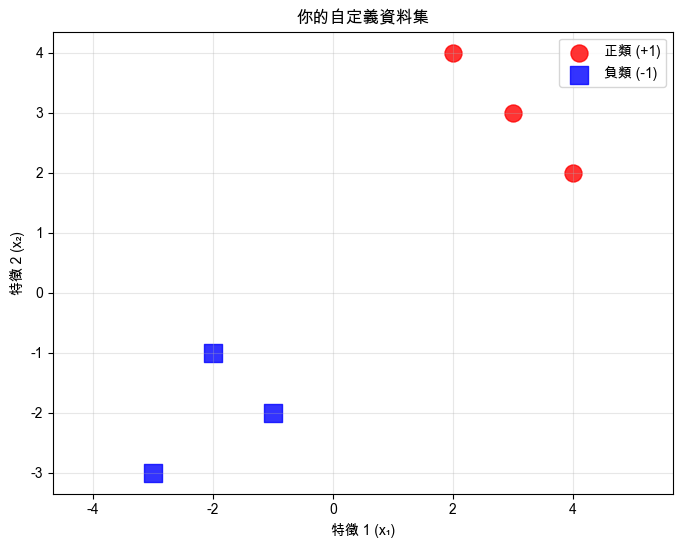


🚀 在你的資料集上訓練感知機...
開始訓練感知機...
資料點數量: 6, 特徵維度: 2
閾值 θ = 0.0
--------------------------------------------------
Epoch   1: 1 個錯誤, 權重 = [3. 3.]
Epoch   2: 0 個錯誤, 權重 = [3. 3.]

🎉 感知機已收斂！
總更新次數: 1
最終權重: [3. 3.]
🎉 太棒了！感知機成功學會了你的資料集！


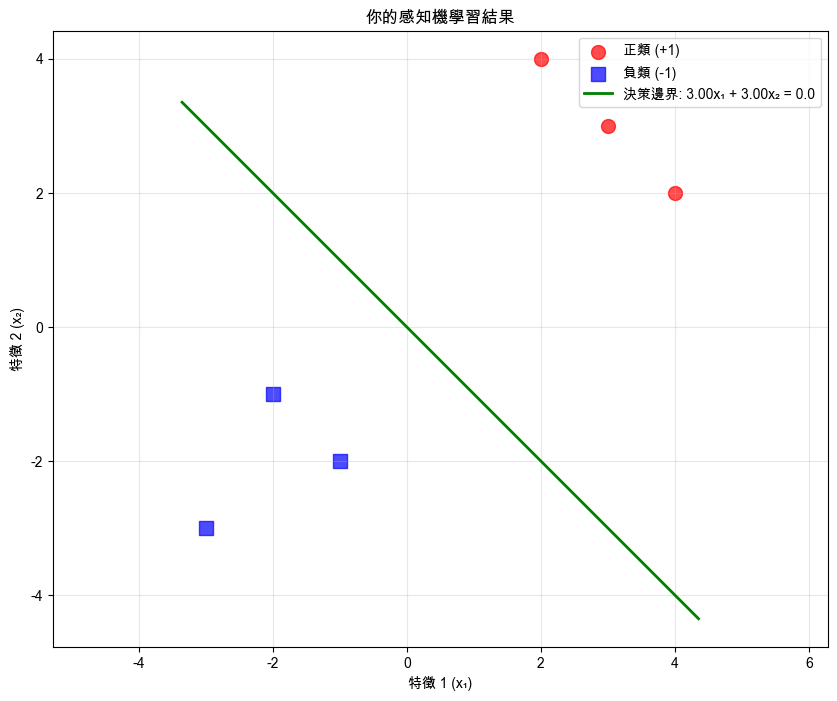

In [12]:
# 🎯 動手練習：創建你自己的資料集！
print("🎯 動手練習時間！")
print("請修改下面的資料點，創建你自己的線性可分資料集")

# 你可以修改這些資料點的座標
# 正類資料點 (標籤 +1)
positive_points = np.array([
    [3, 3],    # 你可以修改這些座標
    [4, 2],
    [2, 4]
])

# 負類資料點 (標籤 -1) 
negative_points = np.array([
    [-2, -1],  # 你可以修改這些座標
    [-1, -2],
    [-3, -3]
])

# 組合資料
X_custom = np.vstack([positive_points, negative_points])
y_custom = np.array([1, 1, 1, -1, -1, -1])

print(f"自定義資料集:")
print(f"正類點: {positive_points.tolist()}")
print(f"負類點: {negative_points.tolist()}")

# 視覺化自定義資料
plt.figure(figsize=(8, 6))
plt.scatter(positive_points[:, 0], positive_points[:, 1], 
           c='red', marker='o', s=150, label='正類 (+1)', alpha=0.8)
plt.scatter(negative_points[:, 0], negative_points[:, 1], 
           c='blue', marker='s', s=150, label='負類 (-1)', alpha=0.8)

plt.xlabel('特徵 1 (x₁)')
plt.ylabel('特徵 2 (x₂)')
plt.title('你的自定義資料集')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# 訓練感知機
print("\n🚀 在你的資料集上訓練感知機...")
perceptron_custom = SimplePerceptron(threshold=0.0)
success = perceptron_custom.fit(X_custom, y_custom, max_epochs=20)

if success:
    print("🎉 太棒了！感知機成功學會了你的資料集！")
    perceptron_custom.plot_decision_boundary(X_custom, y_custom, "你的感知機學習結果")
else:
    print("🤔 感知機沒有完全收斂，可能你的資料不是線性可分的？")
    print("💡 提示：試著讓兩類資料點分得更開一些！")


## 第六部分：總結與反思 🎓

### 我們學到了什麼？

通過這個教學，你已經：

1. **了解了歷史** 📚
   - 感知機是 1957 年 Rosenblatt 提出的第一個學習演算法
   - 它開啟了機器學習和神經網路的時代
   - 雖然簡單，但奠定了現代 AI 的基礎

2. **理解了理論** 🧮
   - 感知機收斂定理保證了線性可分資料的收斂性
   - 不需要學習率，簡單的錯誤修正就能工作
   - 幾何直觀：在高維空間中尋找分離超平面

3. **掌握了實作** 💻
   - 實作了完整的感知機演算法
   - 觀察了學習過程和權重變化
   - 進行了實驗和探索

### 感知機的局限性

雖然感知機很重要，但它也有局限：

- **只能處理線性可分的資料**：如果資料不能用直線分開，感知機就無法收斂
- **只能做二元分類**：無法直接處理多類別問題
- **對雜訊敏感**：一個錯誤標記的資料點可能導致無法收斂

### 現代發展

感知機的思想發展成了：
- **多層感知機 (MLP)**：多個感知機層疊，能處理非線性問題
- **深度學習**：更深的網路，能學習複雜的模式
- **各種神經網路架構**：CNN、RNN、Transformer 等

### 思考問題 🤔

1. 如果資料不是線性可分的，你會怎麼處理？
2. 為什麼現代深度學習需要學習率，而感知機不需要？
3. 感知機收斂定理對現代機器學習有什麼啟發？

### 延伸學習 📖

- 嘗試實作多層感知機
- 學習其他分類演算法（SVM、邏輯回歸等）
- 探索深度學習框架（PyTorch、TensorFlow）
- 閱讀 Rosenblatt 的原始論文

---

**恭喜你完成了感知機的學習之旅！** 🎉

你已經掌握了機器學習歷史上最重要的演算法之一。這個簡單而優雅的演算法，為整個人工智慧領域奠定了基礎。現在你可以自豪地說：「我理解了機器學習的起源！」
